## Unadjusted Odds Ratio

In [13]:
df = pd.read_csv('Full_OR_DATA6.csv')

In [3]:
cf = pd.read_csv('by-age.csv')

PermissionError: [Errno 13] Permission denied

In [ ]:
cf

In [18]:
df = df[df['ETHNICITY_SOURCE_CONCEPT_ID'] != 2]

In [1]:
# importing libraries
import statsmodels.api as sm
import pandas as pd
 
# loading the training dataset
df = pd.read_csv('Full_OR_DATA6.csv', index_col = 0)
df = df[df['ETHNICITY_SOURCE_CONCEPT_ID'] != 2]
 
# defining the dependent and independent variables
Xtrain = df[['RA', 'Age', 'GENDER_SOURCE_CONCEPT_ID', 'ETHNICITY_SOURCE_CONCEPT_ID', 'RACE_CONCEPT_ID', 'Diabetes', 'Hypertension']]
ytrain = df[['ICU']]
  
# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.303273
         Iterations 7


In [ ]:
RA + Age + GENDER_SOURCE_CONCEPT_ID + ETHNICITY_SOURCE_CONCEPT_ID + RACE_CONCEPT_ID + Diabetes + Hypertension

In [11]:
import pandas as pd

In [31]:
# printing the summary table
print(log_reg.summary())

In [22]:
params = log_reg.params
conf = log_reg.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                   5%       95%  Odds Ratio
RA                           0.735224  1.488339    1.046070
Age                          0.976063  0.978315    0.977189
GENDER_SOURCE_CONCEPT_ID     0.562831  0.642043    0.601133
ETHNICITY_SOURCE_CONCEPT_ID  0.885834  1.041725    0.960623
RACE_CONCEPT_ID              0.353933  0.385186    0.369229
Diabetes                     1.755578  2.151308    1.943396
Hypertension                 1.330031  1.604270    1.460729


## Adjusted Odds Ratio

In [23]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [24]:
df = pd.read_csv('Full_OR_DATA6.csv')

In [25]:
df = df[df['ETHNICITY_SOURCE_CONCEPT_ID'] != 2]

In [26]:
import statsmodels.formula.api as smf

In [35]:
model=smf.logit(formula='DEATH_DATETIME ~ RA + Age + GENDER_SOURCE_CONCEPT_ID + ETHNICITY_SOURCE_CONCEPT_ID + RACE_CONCEPT_ID + Diabetes + Hypertension',data=df).fit()
model_odds=pd.DataFrame(np.exp(model.params),columns=['Odds Ratio'])
model_odds['p-value']=model.pvalues
model_odds[['5%','95%']]=np.exp(model.conf_int())
model_odds['significant']=model_odds['p-value']<.05
model_odds=model_odds.drop('Intercept')
model_odds=model_odds.sort_values(by='Odds Ratio',ascending=False)
model_odds

Optimization terminated successfully.
         Current function value: 0.183915
         Iterations 8


,Odds Ratio,p-value,5%,95%,significant
GENDER_SOURCE_CONCEPT_ID,1.838746,2.934722e-43,1.686262,2.005019,True
Diabetes,1.459316,2.734552e-12,1.312585,1.622450,True
RA,1.279159,1.754261e-01,0.895898,1.826377,False
RACE_CONCEPT_ID,1.159983,5.132238e-05,1.079586,1.246367,True
Hypertension,1.112088,3.215404e-02,1.009092,1.225597,True
Age,1.074010,0.000000e+00,1.070985,1.077044,True
ETHNICITY_SOURCE_CONCEPT_ID,0.861853,8.953195e-03,0.770937,0.963492,True


## Final Project Practice

In [6]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
df = pd.read_csv('covidtest.csv')
bf = pd.read_csv('data01.csv')

In [50]:
#df.rename({'id': 'ID'}, axis=1, inplace=True)

In [8]:
df

,id,date_died,age,sex,hypertension,diabetes
0,16169f,9999-99-99,27,2,2,2
1,1009bf,9999-99-99,24,2,2,2
2,167386,9999-99-99,54,1,2,2
3,0b5948,9999-99-99,30,2,2,2
4,0d01b5,22-04-2020,60,1,1,1
...,...,...,...,...,...,...
566597,01ff60,9999-99-99,58,2,2,1
566598,047cd1,9999-99-99,48,1,2,2
566599,1beb81,9999-99-99,49,1,2,2
566600,16fb02,9999-99-99,43,1,2,2


In [9]:
df.rename({'date_died': 'outcome'}, axis=1, inplace=True)

In [10]:
cf = bf[["ID", "outcome", "age", "gendera", "hypertensive", "diabetes"]]

In [11]:
cf

,ID,outcome,age,gendera,hypertensive,diabetes
0,125047,0.0,72,1,0,1
1,139812,0.0,75,2,0,0
2,109787,0.0,83,2,0,0
3,130587,0.0,43,2,0,0
4,138290,0.0,75,2,1,0
...,...,...,...,...,...,...
1172,171130,0.0,62,1,1,1
1173,101659,0.0,78,1,0,1
1174,162069,0.0,85,2,1,1
1175,120967,0.0,79,2,0,1


In [12]:
cf.rename({'ID': 'id', 'gendera': 'sex', 'hypertensive': 'hypertension'}, axis=1, inplace=True)

In [13]:
cf

,id,outcome,age,sex,hypertension,diabetes
0,125047,0.0,72,1,0,1
1,139812,0.0,75,2,0,0
2,109787,0.0,83,2,0,0
3,130587,0.0,43,2,0,0
4,138290,0.0,75,2,1,0
...,...,...,...,...,...,...
1172,171130,0.0,62,1,1,1
1173,101659,0.0,78,1,0,1
1174,162069,0.0,85,2,1,1
1175,120967,0.0,79,2,0,1


In [14]:
transform={2:1,1:0}
df = df.replace({'sex':transform,'hypertension':transform, 'diabetes':transform})

In [15]:
cf = cf.replace({'sex':transform})

In [16]:
df

,id,outcome,age,sex,hypertension,diabetes
0,16169f,9999-99-99,27,1,1,1
1,1009bf,9999-99-99,24,1,1,1
2,167386,9999-99-99,54,0,1,1
3,0b5948,9999-99-99,30,1,1,1
4,0d01b5,22-04-2020,60,0,0,0
...,...,...,...,...,...,...
566597,01ff60,9999-99-99,58,1,1,0
566598,047cd1,9999-99-99,48,0,1,1
566599,1beb81,9999-99-99,49,0,1,1
566600,16fb02,9999-99-99,43,0,1,1


In [17]:
df['outcome'][df['outcome']!='9999-99-99']=1.0

In [18]:
df['outcome'][df['outcome']!=1]=0.0

In [19]:
df

,id,outcome,age,sex,hypertension,diabetes
0,16169f,0.0,27,1,1,1
1,1009bf,0.0,24,1,1,1
2,167386,0.0,54,0,1,1
3,0b5948,0.0,30,1,1,1
4,0d01b5,1.0,60,0,0,0
...,...,...,...,...,...,...
566597,01ff60,0.0,58,1,1,0
566598,047cd1,0.0,48,0,1,1
566599,1beb81,0.0,49,0,1,1
566600,16fb02,0.0,43,0,1,1


In [20]:
cf

,id,outcome,age,sex,hypertension,diabetes
0,125047,0.0,72,0,0,1
1,139812,0.0,75,1,0,0
2,109787,0.0,83,1,0,0
3,130587,0.0,43,1,0,0
4,138290,0.0,75,1,1,0
...,...,...,...,...,...,...
1172,171130,0.0,62,0,1,1
1173,101659,0.0,78,0,0,1
1174,162069,0.0,85,1,1,1
1175,120967,0.0,79,1,0,1


In [21]:
df['covid_status'] = 0
cf['covid_status'] = 1

In [22]:
frames = [df, cf]

result = pd.concat(frames, ignore_index=True)

In [23]:
result['covid_status'].sum()

1177

In [24]:
result = result[~result['outcome'].isnull()]
result['outcome'] = result['outcome'].astype(int)
result['age'] = result['age'].astype(int)
result['sex'] = result['sex'].astype(int)
result['hypertension'] = result['hypertension'].astype(int)
result['diabetes'] = result['diabetes'].astype(int)
result['covid_status'] = result['covid_status'].astype(int)

In [25]:
result

,id,outcome,age,sex,hypertension,diabetes,covid_status
0,16169f,0,27,1,1,1,0
1,1009bf,0,24,1,1,1,0
2,167386,0,54,0,1,1,0
3,0b5948,0,30,1,1,1,0
4,0d01b5,1,60,0,0,0,0
...,...,...,...,...,...,...,...
567774,171130,0,62,0,1,1,1
567775,101659,0,78,0,0,1,1
567776,162069,0,85,1,1,1,1
567777,120967,0,79,1,0,1,1


In [26]:
result = result[result['outcome'] != 98]
result = result[result['sex'] != 98]
result = result[result['hypertension'] != 98]
result = result[result['diabetes'] != 98]

In [27]:
import statsmodels.formula.api as smf

In [28]:
model=smf.logit(formula='outcome ~ covid_status + age + sex',data=result).fit()
model_odds=pd.DataFrame(np.exp(model.params),columns=['Odds Ratio'])
model_odds['p-value']=model.pvalues
model_odds[['5%','95%']]=np.exp(model.conf_int())
model_odds['significant']=model_odds['p-value']<.05
model_odds=model_odds.drop('Intercept')
model_odds=model_odds.sort_values(by='Odds Ratio',ascending=False)
model_odds

Optimization terminated successfully.
         Current function value: 0.195904
         Iterations 8


,Odds Ratio,p-value,5%,95%,significant
sex,1.807317,0.000000e+00,1.765253,1.850383,True
age,1.071549,0.000000e+00,1.070798,1.072301,True
covid_status,0.351947,8.996275e-32,0.295594,0.419044,True


## Matching

In [29]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [30]:
result = result.drop('id', axis = 1)

In [31]:
result = result.dropna().astype('uint8')

In [32]:
result

,outcome,age,sex,hypertension,diabetes,covid_status
0,0,27,1,1,1,0
1,0,24,1,1,1,0
2,0,54,0,1,1,0
3,0,30,1,1,1,0
4,1,60,0,0,0,0
...,...,...,...,...,...,...
567774,0,62,0,1,1,1
567775,0,78,0,0,1,1
567776,0,85,1,1,1,1
567777,0,79,1,0,1,1


In [93]:
result[result['sex'] == 1]

,outcome,age,sex,hypertension,diabetes,covid_status
0,0,27,1,1,1,1
1,0,24,1,1,1,1
3,0,30,1,1,1,1
5,1,47,1,1,0,1
6,0,63,1,0,1,1
...,...,...,...,...,...,...
567764,0,83,1,0,1,0
567767,0,81,1,1,1,0
567771,0,88,1,1,1,0
567776,0,85,1,1,1,0


In [28]:
result

,outcome,age,sex,hypertension,diabetes,covid_status
0,0,27,1,1,1,1
1,0,24,1,1,1,1
2,0,54,0,1,1,1
3,0,30,1,1,1,1
4,1,60,0,0,0,1
...,...,...,...,...,...,...
567774,0,62,0,1,1,0
567775,0,78,0,0,1,0
567776,0,85,1,1,1,0
567777,0,79,1,0,1,0


In [33]:
cat = result.drop(['outcome'], axis = 1)

In [30]:
X=hosp.drop(['covid_status'],axis='columns')
lr = LogisticRegression()
lr.fit(X,hosp['covid_status'])

LogisticRegression()

In [35]:
coeffs = pd.DataFrame({
    'column':X.columns.to_numpy(),
    'coeff':lr.coef_.ravel(),
})
pred_prob = lr.predict_proba(X)
hosp['ps'] = pred_prob[:, 1]

def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

hosp['ps_logit'] = hosp['ps'].apply(lambda x: logit(x))

NameError: name 'hosp' is not defined

In [39]:
hosp

,age,sex,hypertension,diabetes,covid_status,ps,ps_logit
0,27,1,1,1,0,0.000050,-9.900893
1,24,1,1,1,0,0.000036,-10.223867
2,54,0,1,1,0,0.000977,-6.930396
3,30,1,1,1,0,0.000069,-9.577919
4,60,0,0,0,0,0.002764,-5.888448
...,...,...,...,...,...,...,...
567774,62,0,1,1,1,0.002308,-6.069133
567775,78,0,0,1,1,0.003961,-5.527282
567776,85,1,1,1,1,0.025167,-3.656732
567777,79,1,0,1,1,0.004138,-5.483356


# before

<AxesSubplot:xlabel='ps_logit', ylabel='Count'>

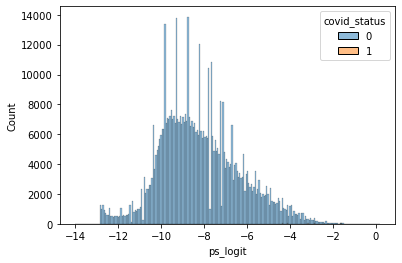

In [40]:
sns.histplot(data=hosp, x='ps_logit', hue='covid_status')

# matching

In [41]:
exclude=[]
def perfom_matching(row, indexes, df_data):
    current_index = row.name
    prop_score_logit = row['ps_logit']
    for idx in indexes[current_index,:]:
        if (current_index != idx) and (row['covid_status'] == 1) and (df_data.loc[idx]['covid_status'] == 0) and (idx not in exclude):
            exclude.append(idx)
            return int(idx)

def obtain_match_details(row, all_data, attribute, key):
    return all_data.loc[row[key]][attribute]

In [35]:
caliper=np.std(hosp['ps'])*.25
print(f'caliper (radius) is: {caliper:.4f}')

knn = NearestNeighbors(n_neighbors=200,algorithm='ball_tree',radius=caliper)
knn.fit(hosp[['ps_logit']])
distances, indexes = knn.kneighbors(hosp[['ps_logit']])

caliper (radius) is: 0.0023


In [38]:
caliper=np.std(cat['ps'])*.25
print(f'caliper (radius) is: {caliper:.4f}')

knn = NearestNeighbors(n_neighbors=200,algorithm='ball_tree',radius=caliper)
knn.fit(cat[['ps_logit']])
distances, indexes = knn.kneighbors(cat[['ps_logit']])

caliper (radius) is: 0.0023


In [44]:
cat = cat.reset_index()

In [45]:
cat['matched_1']=cat.reset_index().apply(perfom_matching,axis='columns',args=(indexes, cat))

covid_hosp_match=cat[~cat['matched_1'].isna()][cat.columns]
control_hosp_match_1=pd.DataFrame(data=covid_hosp_match['matched_1'])

for attr in cat.drop('matched_1',axis='columns'):
    control_hosp_match_1[attr]=control_hosp_match_1.apply(obtain_match_details,axis='columns',all_data=cat,attribute=attr,key='matched_1')
    
control_hosp_match_1=control_hosp_match_1.set_index('matched_1')

In [51]:
data=pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv'

In [46]:
cat

,index,age,sex,hypertension,diabetes,covid_status,ps,ps_logit,matched_1
0,0,27,1,1,1,0,0.000050,-9.900893,NaN
1,1,24,1,1,1,0,0.000036,-10.223867,NaN
2,2,54,0,1,1,0,0.000977,-6.930396,NaN
3,3,30,1,1,1,0,0.000069,-9.577919,NaN
4,4,60,0,0,0,0,0.002764,-5.888448,NaN
...,...,...,...,...,...,...,...,...,...
565581,567774,62,0,1,1,1,0.002308,-6.069133,136806.0
565582,567775,78,0,0,1,1,0.003961,-5.527282,559801.0
565583,567776,85,1,1,1,1,0.025167,-3.656732,299618.0
565584,567777,79,1,0,1,1,0.004138,-5.483356,85839.0


In [ ]:
hosp['covid_status'].sum()

In [39]:
hosp.to_csv('PropTest.csv')

In [42]:
hosp['matched_1']=hosp.reset_index().apply(perfom_matching,axis='columns',args=(indexes, hosp))

covid_hosp_match=hosp[~hosp['matched_1'].isna()][hosp.columns]
control_hosp_match_1=pd.DataFrame(data=covid_hosp_match['matched_1'])

for attr in hosp.drop('matched_1',axis='columns'):
    control_hosp_match_1[attr]=control_hosp_match_1.apply(obtain_match_details,axis='columns',all_data=hosp,attribute=attr,key='matched_1')
    
control_hosp_match_1=control_hosp_match_1.set_index('matched_1')

KeyError: 6815

In [ ]:
hosp['matched_2']=hosp.reset_index().apply(perfom_matching,axis='columns',args=(indexes, hosp))

covid_hosp_match=hosp[~hosp['matched_2'].isna()][hosp.columns]
control_hosp_match_2=pd.DataFrame(data=covid_hosp_match['matched_2'])

for attr in hosp.drop(['matched_1','matched_2'],axis='columns'):
    control_hosp_match_2[attr]=control_hosp_match_2.apply(obtain_match_details,axis='columns',all_data=hosp,attribute=attr,key='matched_2')
    
control_hosp_match_2=control_hosp_match_2.set_index('matched_2')

In [ ]:
hosp['matched_3']=hosp.reset_index().apply(perfom_matching,axis='columns',args=(indexes, hosp))

covid_hosp_match=hosp[~hosp['matched_3'].isna()][hosp.columns]
control_hosp_match_3=pd.DataFrame(data=covid_hosp_match['matched_3'])

for attr in hosp.drop(['matched_1','matched_2','matched_3'],axis='columns'):
    control_hosp_match_3[attr]=control_hosp_match_3.apply(obtain_match_details,axis='columns',all_data=hosp,attribute=attr,key='matched_3')
    
control_hosp_match_3=control_hosp_match_3.set_index('matched_3')

In [ ]:
all_matched_hosp=pd.concat([hosp[hosp['COVID']==1],control_hosp_match_1,control_hosp_match_2,control_hosp_match_3],ignore_index=True)

# after

In [ ]:
sns.histplot(data=all_matched_hosp, x='ps_logit', hue='covid_status')

In [ ]:
%store all_matched_hosp
matched_hosp=hosp
%store matched_hosp

In [ ]:
all_matched_hosp_insulin=all_matched_hosp
%store all_matched_hosp_insulin

In [142]:
%store hosp

Stored 'hosp' (DataFrame)
